<a href="https://colab.research.google.com/github/Hjarrar14/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediciton of Product Sales

- Author: Hisham Jarrar

##Project Overview

##Load and Inspect Data

In [5]:
import pandas as pd
import numpy as np
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [8]:
df =pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
obj_col = df.select_dtypes('object').columns
obj_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
df.loc[:,obj_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [12]:
num_col =df.select_dtypes('number').columns

In [13]:
df.loc[:,num_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [14]:
duplicate_row = df.duplicated()
duplicate_row.sum()

0

In [15]:
unq_value = df.nunique()
unq_value

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [16]:
unq_value/len(df)*100

,0
Item_Identifier,18.291681
Item_Weight,4.869178
Item_Fat_Content,0.058665
Item_Visibility,92.455708
Item_Type,0.187727
Item_MRP,69.670304
Outlet_Identifier,0.117330
Outlet_Establishment_Year,0.105597
Outlet_Size,0.035199
Outlet_Location_Type,0.035199


In [17]:
null_value = df.isna().sum()
null_value

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [18]:
null_value/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [19]:
df[obj_col].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [20]:
df[obj_col] = df[obj_col].fillna('MISSING')
df[obj_col].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [21]:
df[num_col].isna().sum()

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [22]:
df[num_col] = df[num_col].fillna(-1)
df[num_col].isna().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [23]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [24]:
df[obj_col].nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,4
Outlet_Location_Type,3
Outlet_Type,4


In [25]:
for col in obj_col:
  print(f'the value counts for {col}')
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

the value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


the value counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


the value counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


the value counts for Outlet_Identifier
Outlet_Identifier
OUT0

In [26]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [27]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'Low Fat' : 'low fat',
    'Regular' : 'regular',
    'LF' : 'low fat',
    'reg' : 'regular'
})

In [28]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
low fat,5517
regular,3006


In [29]:
for col in num_col:
  print(f'the describe of the {col}')
  print(df[col].describe())
  print('\n')

the describe of the Item_Weight
count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


the describe of the Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


the describe of the Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


the describe of the Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


the describe of the Item_O

##Exploratory Data Analysis

In [30]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Show data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [33]:
df[num_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [57]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##Histograms plot

to view the distributions of numerical features

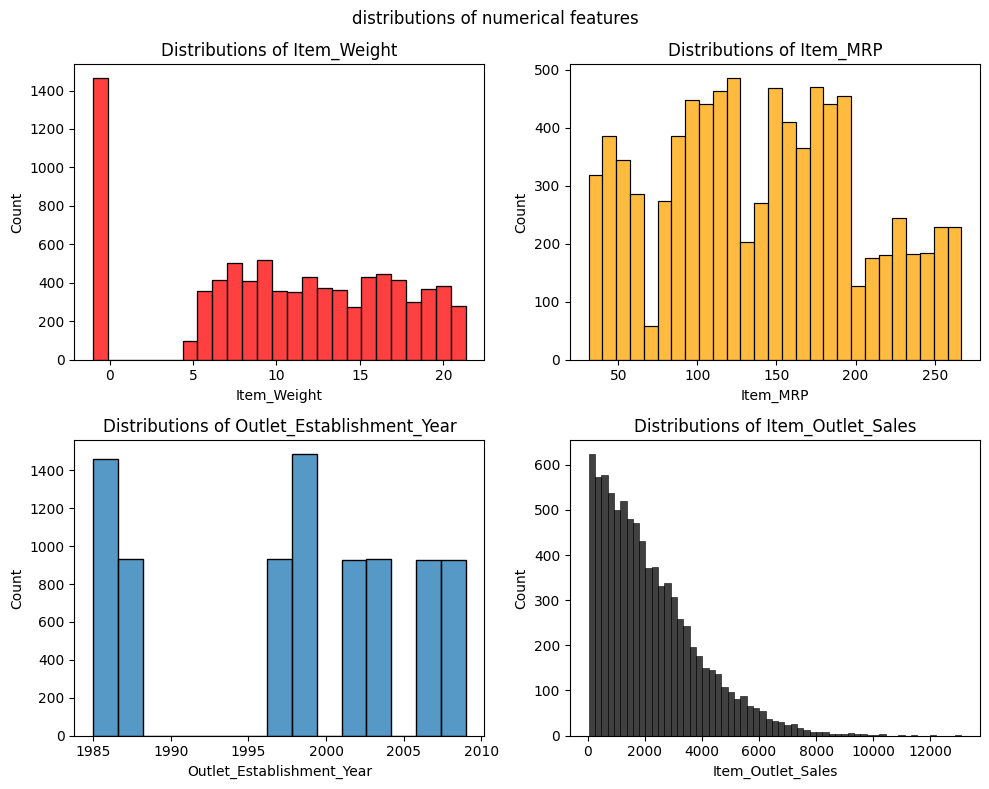

In [50]:
## Creating subplots with 2 rows and 2 columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
#subplot 0,0 (top-left)
sns.histplot(data=df ,x ='Item_Weight',
             bins='auto',color='red',edgecolor='black',ax=axes[0,0])
axes[0,0].set_title('Distributions of Item_Weight')
#subplot 0,1 (top-right)
sns.histplot(data=df ,x ='Item_MRP',
             bins='auto',color='orange',edgecolor='black',ax=axes[0,1])
axes[0,1].set_title('Distributions of Item_MRP')
#subplot 1,0 (bottom-left)
sns.histplot(data=df ,x ='Outlet_Establishment_Year',
             bins='auto',edgecolor='black',ax=axes[1,0])
axes[1,0].set_title('Distributions of Outlet_Establishment_Year')
#subplot 1,1 (bottom-Right)
sns.histplot(data=df ,x ='Item_Outlet_Sales',
             bins='auto',color='black',edgecolor='black',ax=axes[1,1])
axes[1,1].set_title('Distributions of Item_Outlet_Sales')
#figure title and fixing overlap
fig.suptitle('distributions of numerical features')
fig.tight_layout()


##Boxplots
to view statistical summaries of numerical features

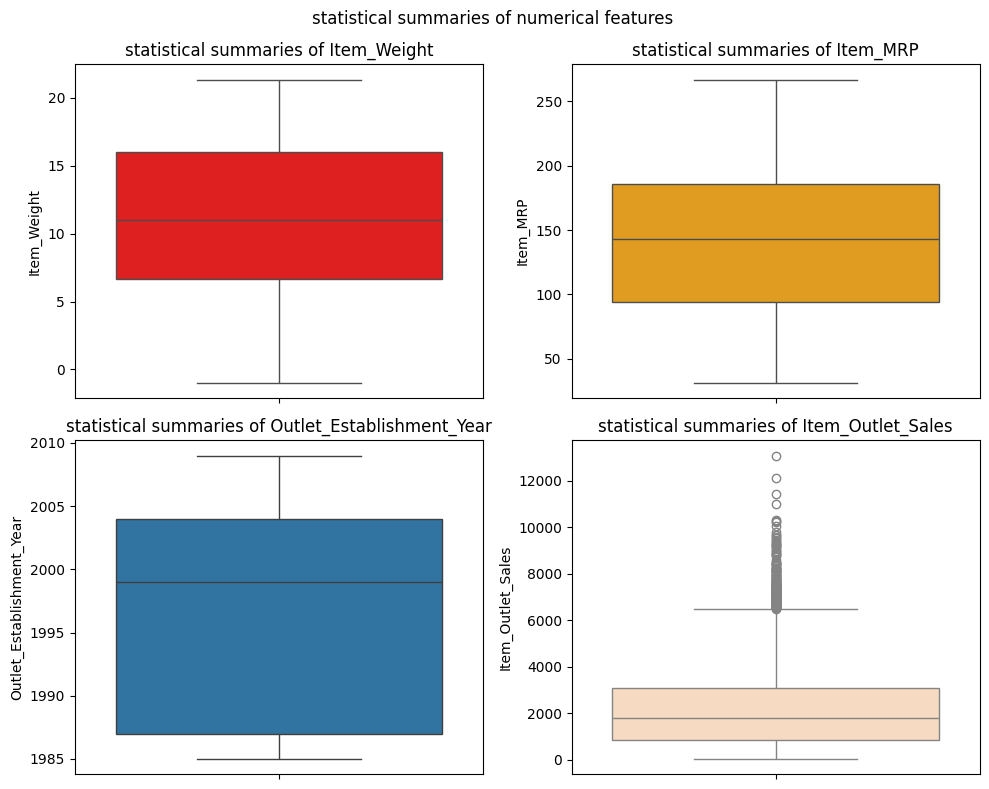

In [67]:
## Creating subplots with 2 rows and 2 columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
#subplot 0,0 (top-left)
sns.boxplot(data=df ,y ='Item_Weight',
             color='red',ax=axes[0,0])
axes[0,0].set_title('statistical summaries of Item_Weight')
#subplot 0,1 (top-right)
sns.boxplot(data=df ,y ='Item_MRP',
             color='orange',ax=axes[0,1])
axes[0,1].set_title('statistical summaries of Item_MRP')
#subplot 1,0 (bottom-left)
sns.boxplot(data=df ,y ='Outlet_Establishment_Year',
             ax=axes[1,0])
axes[1,0].set_title('statistical summaries of Outlet_Establishment_Year')
#subplot 1,1 (bottom-Right)
sns.boxplot(data=df ,y ='Item_Outlet_Sales',
            color='peachpuff',ax=axes[1,1])
axes[1,1].set_title('statistical summaries of Item_Outlet_Sales')
#figure title and fixing overlap
fig.suptitle('statistical summaries of numerical features ')
fig.tight_layout()

##Countplots

to view the frequency of each class of categorial features

In [68]:
df[obj_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,low fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,low fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,low fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


<ipython-input-95-4020c3735e9c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation =45,ha='right');


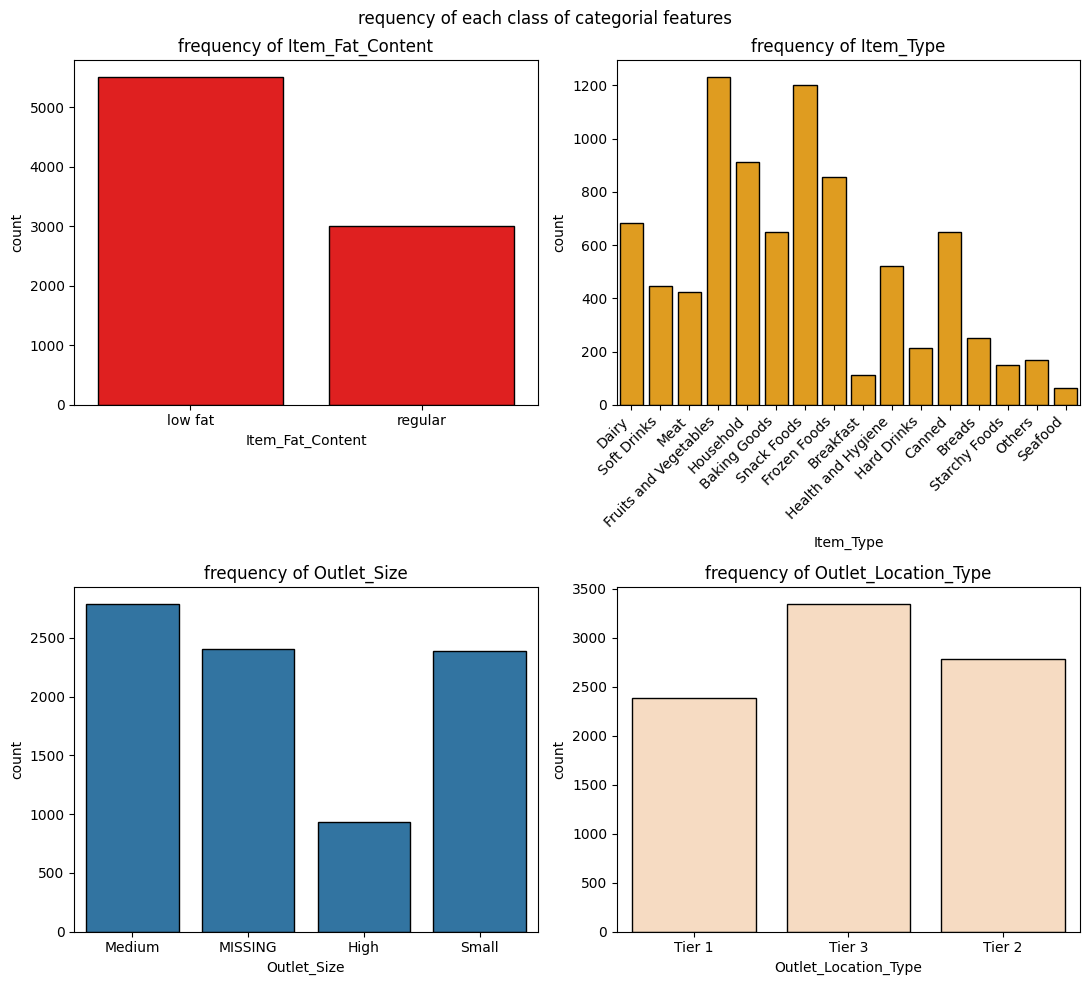

In [95]:
from pydoc import plain
## Creating subplots with 2 rows and 2 columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(11,10))
#subplot 0,0 (top-left)
sns.countplot(data=df ,x ='Item_Fat_Content',
              edgecolor='black',color='red',ax=axes[0,0])
axes[0,0].set_title('frequency of Item_Fat_Content')
#subplot 0,1 (top-right)
sns.countplot(data=df ,x ='Item_Type',
              edgecolor='black',color='orange',ax=axes[0,1])
axes[0,1].tick_params(axis='x',rotation =45)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation =45,ha='right');
axes[0,1].set_title('frequency of Item_Type')
#subplot 1,0 (bottom-left)
sns.countplot(data=df ,x ='Outlet_Size',
             edgecolor='black',ax=axes[1,0])
axes[1,0].set_title('frequency of Outlet_Size')
#subplot 1,1 (bottom-Right)
sns.countplot(data=df ,x ='Outlet_Location_Type',
            edgecolor='black',color='peachpuff',ax=axes[1,1])
axes[1,1].set_title('frequency of Outlet_Location_Type')
#figure title and fixing overlap
fig.suptitle('requency of each class of categorial features')
fig.tight_layout()

##Heatmap
to view the correlation between features.


In [97]:
#Calculate correlation
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


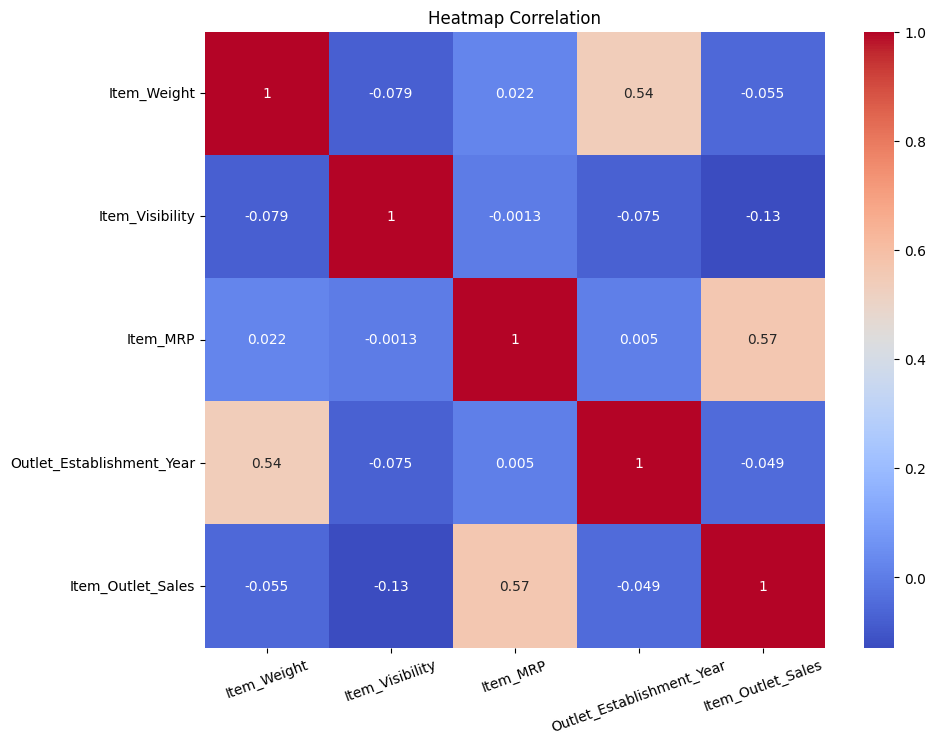

In [116]:
# Make a hetmap of correlations
fig ,ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data=corr,cmap='coolwarm',annot=True)
ax.set_title('Heatmap Correlation')
ax.set_xticklabels(ax.get_xticklabels(),rotation =20,ha='center');

<ipython-input-154-9f41ce4e633c>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation =45,ha='right');
<ipython-input-154-9f41ce4e633c>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation =45,ha='right');


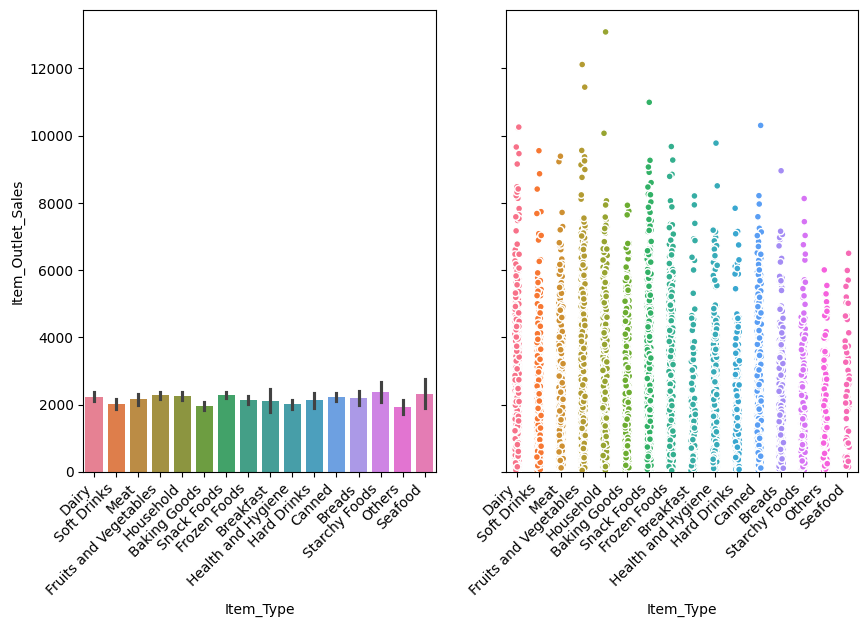

In [154]:
fig,ax = plt.subplots(ncols=2 , sharey=True , figsize=(10,6))
sns.barplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',hue='Item_Type',
            ax=ax[0])
sns.stripplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',hue='Item_Type',
            edgecolor='white',linewidth=1,ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation =45,ha='right');
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation =45,ha='right');


<ipython-input-150-a447da57f317>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =45,ha='right');


Text(0.5, 1.0, 'Item_Type VS Item_Outlet_Sales')

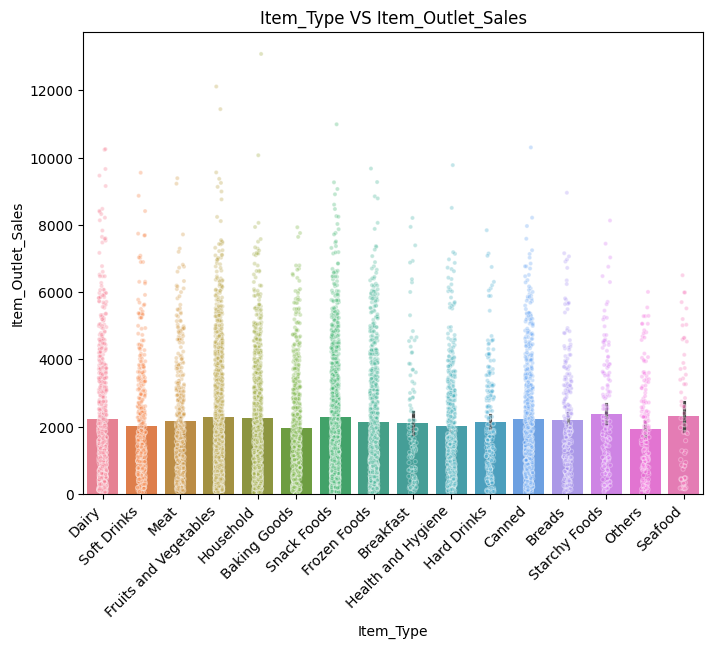

In [150]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',
            hue='Item_Type')
sns.stripplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',hue='Item_Type',
            edgecolor='white',linewidth=.8,s=3,alpha=.3,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45,ha='right');
ax.set_title('Item_Type VS Item_Outlet_Sales')

##Feature Inspection